![bts_logo](bts_logo.png)
# **Binomial Distribution**
### *By Ennio Maldonado*
---

### **Index**

0. Preliminaries
1. The Uniform Distribution
    1. Mathematical Formalities
    2. Python Implementation
2. The Bernoulli Distribution
    1. Mathematical Formalities
    2. Python Implementation
3. The Binomial Distribution
    1. Mathematical Formalities
    2. Python Implementation

## Preliminaries

Imports and other configs for the later examples.

In [173]:
# for inline plots in jupyter
%matplotlib inline 

import matplotlib.pyplot as plt # import matplotlib
import numpy as np
import seaborn as sns # import seaborn
import pandas as pd

from scipy.stats import uniform # import uniform distribution
from scipy.stats import bernoulli # import bernoulli distribution
from scipy.stats import binom # import binomial distribution

# Seaborn config
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

## 1.- The Uniform distribution
---

### Mathematical Formalities

A uniform distribution, sometimes also known as a rectangular distribution, is a distribution that has constant probability, and describes en experiment where there is an arbitrary outcome (that is, all outcomes are equally likely) that lies between certain bounds defined by parameters *a* (lower limit) and *b* (upper limit), this interval can be either closed *[]* or open *()*. This distribution is often abreviated as *U(a,b)*.

![UNiform Distribution](uniform.png)

The probability density function and cumulative distribution function for a continuous uniform distribution on the interval [a,b] are 

![PDF & CDF](uniformmath.png)

The mean and variance of the uniform distribution are:

![mean and variance](uniformmath2.png)

**Intuition**: An scenario where all posibilities are equally likely has a uniform distrbution, for example selecting one card out of a deck of 52 cards, or rolling a fair six sided die (rolling a die where a number, for example 6, is more likley to occur does not have a uniform distribution).

#### Examples

The average weight gained by a person over the winter months in uniformly distributed and ranges from 0 to 10kg. Find the probability that a person will gain between 3 and 5 kg.

Probability = (b - a) * 1 / 10 = (5 - 3) * 1 / 10 = 2 / 10 = 1 / 5 =  0.2

---

### Python Implementation

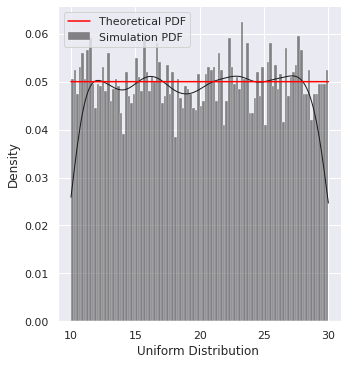

In [174]:
# random numbers from uniform distribution
n = 10000
a = 10
b =  30
width = b - a


data_uniform = uniform.rvs(size=n, loc = a, scale=width)


mean, var, skew, kurt = uniform.stats(loc = a, scale=width, moments='mvsk')

# Simulation Plot
simplot = sns.displot(data=data_uniform,
                  bins=100,
                  kde=True,
                  color='k',
                  stat='density',                     
                  line_kws={"linewidth": 1,'alpha':1},
                  label="Simulation PDF")
simplot.set(xlabel='Uniform Distribution ', ylabel='Density')

# Theoretical Result
x = np.linspace(10, 30, 10000)
plt.plot(x, uniform.pdf(x, loc=a,scale=width), color='red', label="Theoretical PDF")

plt.legend(loc='best')

## 2.- The Bernoulli distribution
---

### Mathematical Formalities

![Boernoulli Distribution](bernoulli.png)

The Bernoulli distribution is a discrete distribution having two possible outcomes labelled by *n = 0* and *n = 1* in which *n = 1* ("success") occurs with probability *p* and *n = 0* ("failure") occurs with probability *q = 1 - p*, where *0 < p < 1*. It therefore has probability density function:

![Bernoulli PDF](bernoullimath.png)

which can also be written:

![Bernoulli PDF](bernoullimath2.png)

 The performance of a fixed number of trials with fixed probability of success on each trial is known as a Bernoulli trial.

The distribution of heads and tails in coin tossing is an example of a Bernoulli distribution with p=q=1/2. The Bernoulli distribution is the simplest discrete distribution, and it the building block for other more complicated discrete distributions. The distributions of a number of variate types defined based on sequences of independent Bernoulli trials that are curtailed in some way are summarized in the following table (Evans et al. 2000, p. 32).

| distribution | definition |
| --- | --- |
| binomial distribution | number of successes in n trials |
| geometric distribution | number of failures before the first success |
| negative binomial distribution | number of failures before the xth success |

**Intuition**: You can actually take any process and divide its sample space into 2 parts by any well-defined criterion. Let’s consider a few processes:

- Flipping a coin
- Rolling a 6-sided die
- Drawing a random card from a 52-card deck
- Spinning a roulette wheel

Coin flipping has a natural Bernoulli distribution if you are considering the probability of “heads” or “tails”. Rolling a die could be accommodated if you divide the 6 possible outcomes in 2 groups, like “odd vs. even” or “1/5 vs. 2/3/4/6”. With the card drawing example, you could also divide the 52 possible outcomes into 2 groups, like “red vs. black suit”. Similarly, with a roulette wheel, you could divide the outcomes into, say, “less than vs. greater than or equal to 10”.

---

### Python Implementation

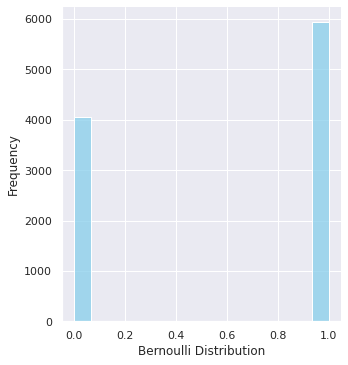

In [175]:
data_bern = bernoulli.rvs(size=10000,p=0.6)

ax= sns.displot(data_bern,
                 kde=False,
                 color="skyblue")
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

---

## 3.- The Binomial Distribution

---

### 1.- Mathematical Formalities

The binomial distribution gives the discrete probability distribution of obtaining exactly *k* successes out of *n* Bernoulli trials (where the result of each Bernoulli trial is true with probability *p* and false with probability *q = 1 - p*). The binomial distribution Probability Mass Function (PMF) is therefore given by:

![Binom PDF](binommath.png)

And the Cummulative Distribution Function (CDF) is given by:

![Binom CDF](binommath2.png)

The plot below shows the distribution of *n* successes out of *N = 20* trials with *p = q = 1/2*. 

![Binom](binom.png)

The binomial distribution is frequently used to model the number of successes in a sample of size *n drawn with replacement from a population of size N*. If the sampling is carried out without replacement, the draws are not independent and so the resulting distribution is a hypergeometric distribution, not a binomial one. However, for N much larger than n, the binomial distribution remains a good approximation, and is widely used. 

**Parameters**

- n = Number of trials
- p = Probability of success, for a fair coin it would be 0.5
- k = Target number of successes.

**Expected Value and Variance**

- E[X] = μ = np
- VAR[X] = σ^2 = np(1 - p)


**Notes**

- The formulations apply only for i.i.d (independent identically distributed) random variables.
- There are only two possible outcomes at each trial,
- The probability of "success" at each trial is constant.

**Normal Aproximation**

If n is large enough, then the skew of the distribution is not too great. In this case a reasonable approximation to B(n, p) is given by the normal distribution

![Binom CDF](binommath3.png)

This basic approximation can be improved by using a suitable continuity correction. The basic approximation generally improves as *n* increases (at least 20) and is better when *p* is not near to 0 or 1. Various rules of thumb may be used to decide whether n is large enough, and p is far enough from the extremes of zero or one.

---

### Examples

#### Example 1

Let’s say that 80% of all business startups in the IT industry report that they generate a profit in their first year. If a sample of 10 new IT business startups is selected, find the probability that exactly seven will generate a profit in their first year.

First, do we satisfy the conditions of the binomial distribution model?

 - There are only two possible mutually exclusive outcomes – to generate a profit in the first year or not (yes or no).
 - There are a fixed number of trials (startups) – 10.
 - The IT startups are independent and it is reasonable to assume that this is true.

We know that:

n = 10, p=0.80, q=0.20, x=7

The probability of 7 IT startups to generate a profit in their first year is:

![Binom Example](binomexample.png)

This is equivalent to:

![Binom Example](binomexample1.png)

Interpretation/solution: There is a 20.13% probability that exactly 7 of 10 IT startups will generate a profit in their first year when the probability of profit in the first year for each startup is 80%.

#### Example 2

Your basketball team is playing a series of 5 games against your opponent. The winner is those who wins more games (out of 5).

Let assume that your team is much more skilled and has 75% chances of winning. It means there is a 25% chance of losing.

What is the probability of your team get 3 wins?

We need to find out.

In this example:

n = 5, p=0.75, q=0.25, x=3

Let’s replace in the formula to get the answer:

![Binom Example 2](binomexample2.png)

Interpretation: the probability that you win 3 games is 0.264.

---

### Python Implementation

IN order to show an usa case example, in this section I will show a simluation of a 10 trials coin toss with a fair coin p = 0.5, repeated a either ten times or a 1000 times, then plotted against the actual theoretical binomial distribution.

/home/techno/.local/share/virtualenvs/20_Statistical_Foundations_For_DS-8_V209ZX/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/home/techno/.local/share/virtualenvs/20_Statistical_Foundations_For_DS-8_V209ZX/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/home/techno/.local/share/virtualenvs/20_Statistical_Foundations

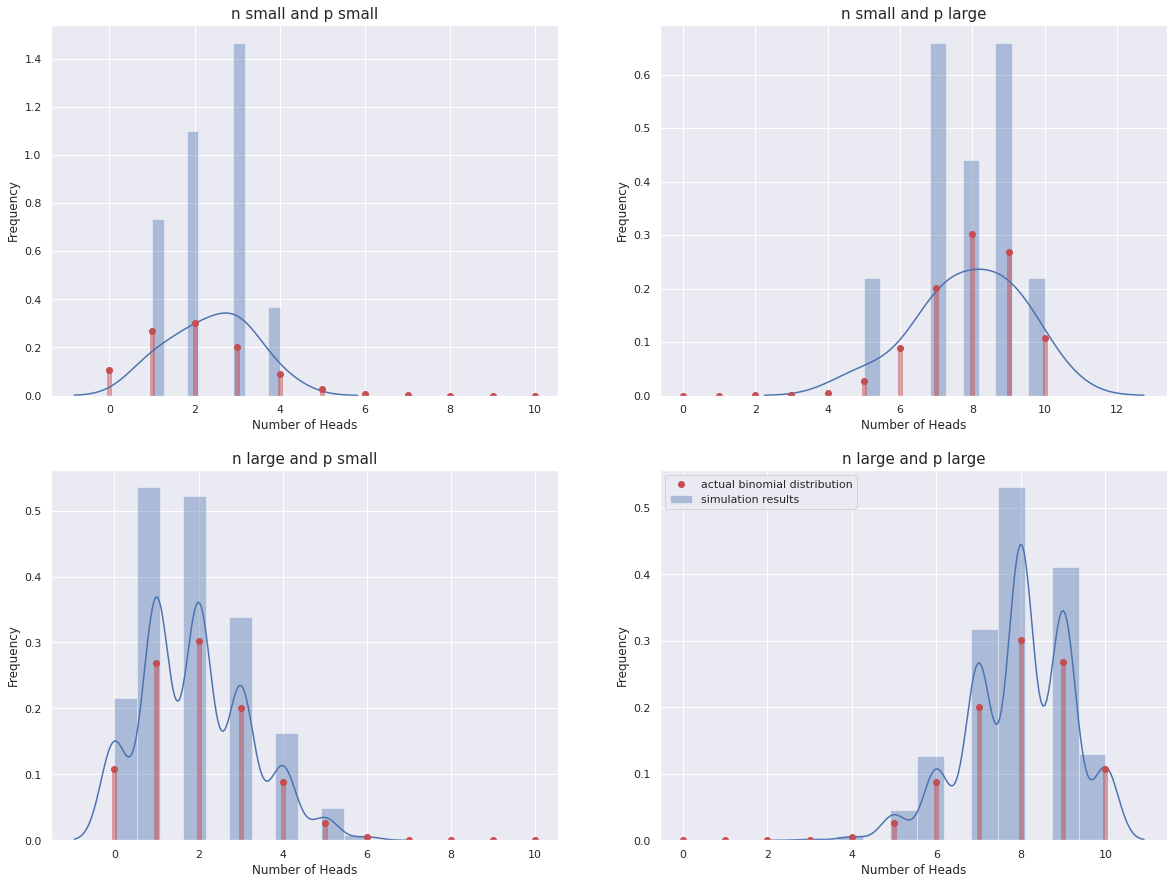

In [176]:
# Simluation of a 10 trials coin toss with a fair coin p = 0.5, repeated a 1000 times.

# Simulation Parameters
trials = [10, 1000] # Number of trials
n = 10 # Number of independent experiments in each trial
p = [0.2, 0.8] # Probability of success for each experiment

# Function that runs the coin toss trials
# heads is a list of the number of successes from each trial of n experiments

def run_binom(trials, n, p):
    heads = []
    for i in range(trials):
        tosses = [np.random.random() for i in range(n)] 
        heads.append(len([i for i in tosses if i<=p])) # if random <= p then HEAD, else TAILS.
    return heads

# Run the function
heads_n_small_p_small = run_binom(trials[0], n, p[0])
heads_n_large_p_small = run_binom(trials[1], n, p[0])
heads_n_small_p_large = run_binom(trials[0], n, p[1])
heads_n_large_p_large = run_binom(trials[1], n, p[1])


# Subplots
fig, axes = plt.subplots(2,2,figsize=(20,15))

# For case n_small & p_small 
sns.distplot(heads_n_small_p_small, bins=11, label='simulation results', ax=axes[0][0])
axes[0][0].set_xlabel("Number of Heads")
axes[0][0].set_ylabel("Frequency")
axes[0][0].set_title("n small and p small", fontsize=15)

x = range(0,11)
axes[0][0].plot(x, binom.pmf(x, n, p[0]), 'ro', label='actual binomial distribution')
axes[0][0].vlines(x, 0, binom.pmf(x, n, p[0]), colors='r', lw=5, alpha=0.5)
plt.legend()

# For case n_large & p_small 
sns.distplot(heads_n_large_p_small, bins=11, label='simulation results', ax=axes[1][0])
axes[1][0].set_xlabel("Number of Heads")
axes[1][0].set_ylabel("Frequency")
axes[1][0].set_title("n large and p small", fontsize=15)

x = range(0,11)
axes[1][0].plot(x, binom.pmf(x, n, p[0]), 'ro', label='actual binomial distribution')
axes[1][0].vlines(x, 0, binom.pmf(x, n, p[0]), colors='r', lw=5, alpha=0.5)
plt.legend()

# For case n_small & p_large 
sns.distplot(heads_n_small_p_large, bins=11, label='simulation results', ax=axes[0][1])
axes[0][1].set_xlabel("Number of Heads")
axes[0][1].set_ylabel("Frequency")
axes[0][1].set_title("n small and p large", fontsize=15)

x = range(0,11)
axes[0][1].plot(x, binom.pmf(x, n, p[1]), 'ro', label='actual binomial distribution')
axes[0][1].vlines(x, 0, binom.pmf(x, n, p[1]), colors='r', lw=5, alpha=0.5)
plt.legend()

# For case n_large & p_large
sns.distplot(heads_n_large_p_large, bins=11, label='simulation results', ax=axes[1][1])
axes[1][1].set_xlabel("Number of Heads")
axes[1][1].set_ylabel("Frequency")
axes[1][1].set_title("n large and p large", fontsize=15)

x = range(0,11)
axes[1][1].plot(x, binom.pmf(x, n, p[1]), 'ro', label='actual binomial distribution')
axes[1][1].vlines(x, 0, binom.pmf(x, n, p[1]), colors='r', lw=5, alpha=0.5)
plt.legend()

plt.show()

---
# THE END